# Ecuaciones Diferenciales para ingeniería BAIN081

Una ecuación diferencial es una ecuación donde hay involucrado un operador diferencial y la incognita es una función por ejemplo la ecuación: 
$$\begin{equation}
y(x)=\dfrac{dy}{dx}(x)
\label{ec1}
\end{equation}$$

en esta ecuación deseamos encontrar una función que sea igual a su derivada. De calculo I sabemos que la derivada de la función $y(x)=e^x$ es $\frac{dy(x)}{dx}=e^x$, por lo tanto $y(x)=e^x$ es una solución de ecuación diferencial anterior.

Para resolver una ecuación diferencial usaremos la librería simbólica de python sympy, para declarar la librería debemos escribir lo sigiuente import sympy, si ademas queremos darle un anacrónimo podemos escribir import sympy as sym. 



In [1]:
import sympy as sym

para declarar una variable simbólica $x$ y una función simbólica $y(x)$, en python debemos proceder de la sigiente manera: 

In [2]:
x=sym.Symbol('x')
y=sym.Function('y')

Ahora que tenemos bien declaradas las variables escribiremos la ecuación diferencia $y=y'$, usando el comando simbólico Eq de sympy, 

In [3]:
ec1=sym.Eq(y(x)-y(x).diff(x),0)
ec1

Eq(y(x) - Derivative(y(x), x), 0)

Para resolver la ecuación simplemente llamamos a la función de sympy que resuelve ecuaciones diferenciales dsolve. 

In [4]:
sym.dsolve(ec1)

Eq(y(x), C1*exp(x))

Si deseamos graficar la solución podemos utilizar la librería matplotlib, además de esto, necesitaremos la librería numpy. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Ahora declararemos la variables $xp$ y $yp$ que forman los pares ordenados (xp,yp) por donde graficaremos la solución $y(x)=C_1e^x$. Por lo tanto declararemos un vector $xp$ que va desce 0 hasta 10 y se salta 

In [6]:
xp=np.arange(0,10,0.1)
yp=np.exp(xp)

Ahora a graficar con dos sencillos comandos, 

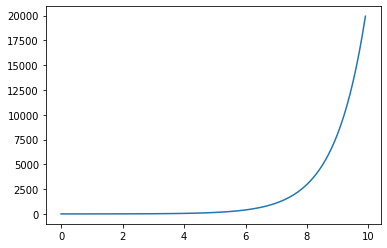

In [7]:
plt.plot(xp,yp)
plt.show()

otra forma de graficar es usando la librería simbólica, mediante la función plot

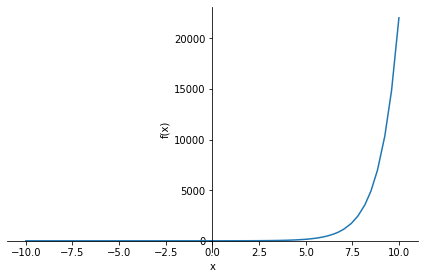

In [8]:
sym.plot(sym.exp(x))

Notemos que en ambos caso solamente graficamos la solución $y(x)=e^x$, es decir que $C_1=1$, por lo tanto para graficar una familia de soluciones graficaremos muchas veces, 

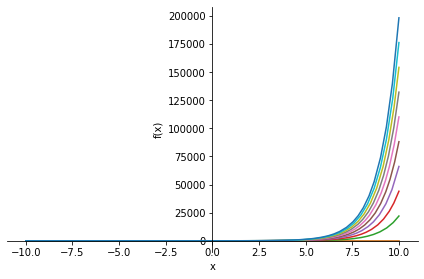

In [9]:
Graficas=sym.plot(0*sym.exp(x),show=False)
for Ci in np.arange(0,10,1):
    Graficas.extend(sym.plot(Ci*sym.exp(x),show=False))
Graficas.show()

### Ejercicios: 
Resuelva las siguientes ecuaciones diferenciales y grafique la familia de soluciones correspondiente.

(a) $\dfrac{dy}{dx}=\dfrac{x+2}{y^4}$ 

(b) $y=\frac{1}{4}y'x-1$


In [16]:
##### Solución (a)
import sympy as sym
x=sym.Symbol('x')
y=sym.Function('y')
ec_a=sym.Eq(y(x).diff(x),(x+2)/(y(x)**4))
ec_a ### Para verificar que escribimos la ecuación correcta.

Eq(Derivative(y(x), x), (x + 2)/y(x)**4)

In [17]:
sym.dsolve(ec_a)

[Eq(y(x), (C1 + 5*x**2/2 + 10*x)**(1/5)),
 Eq(y(x), (-sqrt(5) - 1 - sqrt(2)*I*sqrt(5 - sqrt(5)))*(C1 + 5*x**2/2 + 10*x)**(1/5)/4),
 Eq(y(x), (-sqrt(5) - 1 + sqrt(2)*I*sqrt(5 - sqrt(5)))*(C1 + 5*x**2/2 + 10*x)**(1/5)/4),
 Eq(y(x), (-1 + sqrt(5) - sqrt(2)*I*sqrt(sqrt(5) + 5))*(C1 + 5*x**2/2 + 10*x)**(1/5)/4),
 Eq(y(x), (-1 + sqrt(5) + sqrt(2)*I*sqrt(sqrt(5) + 5))*(C1 + 5*x**2/2 + 10*x)**(1/5)/4)]